In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [125]:
def load_data():
    """
    Returns:
    X - training data with dimensions (n_of_features, n_of_examples)
    Y - labels (1 on the class index, -1 elsewhere) with dimensions (n_of_features, n_of_examples)
    """
    x1 = []
    x2 = []
    classes = []
    with open('tren_data2_06.txt') as f:
        for line in f:
            line = line.split()
            
            x1.append(float(line[0]))
            x2.append(float(line[1]))
            classes.append(int(float(line[2])))
    
    X = np.array([[x1, x2] for x1, x2 in zip(x1, x2)])
    
    classes = np.array(classes)
    """
    Y = np.zeros(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = 1
    """
    Y = np.ones(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = -1
    Y = -Y

    return X.T, Y.T, classes

In [126]:
X, Y, classes = load_data()

print(X[:,0])
print(Y[:,0])
# print(classes)

[ 7.6919123 -6.8810342]
[ 1. -1. -1. -1. -1.]


In [127]:
def plotPoints(X, classes):
    plt.figure(figsize=(10, 7))
    X = np.array(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes)
    plt.title("Zobrazení dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.savefig('obr/data1.png') # NUTNO ZMENIT PRO DANA DATA
    plt.show()

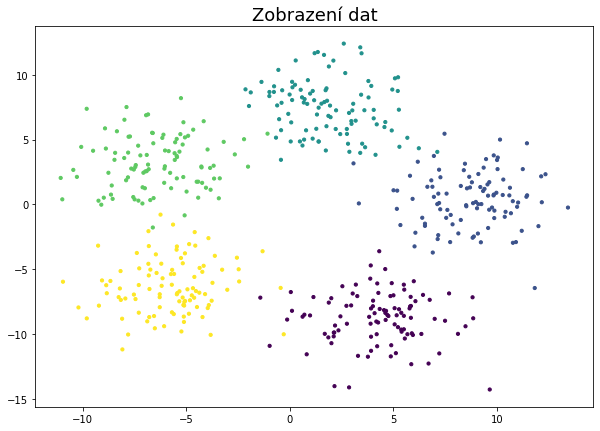

In [128]:
plotPoints(X.T, classes)

## Building blocks

### Initialization

In [129]:
def initialize_parameters(n_x, n_y):
    """
    Argument:
    n_x - size of the input layer
    n_y - size of the output layer
    
    Returns:
    W - weight matrix of shape (n_y, n_x)
    b - bias vector of shape(n_y- 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y,1))
    
    return W, b

In [130]:
# parametry site
W, b = initialize_parameters(2, 5)
print(W.shape)
print(b.shape)
print(W)
print(b)

(5, 2)
(5, 1)
[[-0.01653085 -0.00340798]
 [-0.00981891  0.01574112]
 [ 0.00091792  0.00445423]
 [ 0.01344032  0.0092304 ]
 [ 0.00455556  0.00198006]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Forward Propagation

In [131]:
def forward_propagation(X, W, b):
    """
    Argument:
    X - input data of size (n_x, m)
    W - weights matrix
    b - bias vector
    
    Returns:
    A - The output of the activation
    """
    
    Z = np.dot(W, X) + b
    A = np.sign(Z)
    
    return A

In [132]:
A = forward_propagation(X, W, b)

In [133]:
print(A.shape)
# priklad vystupu neuronove site
print(A[:,0])
print(A[:,250])

(5, 500)
[-1. -1. -1.  1.  1.]
[-1.  1.  1.  1.  1.]


### Compute Cost

In [134]:
def compute_cost(A, Y):
    """
    Argument:
    A - output of neural network
    Y - correct label
    
    Returns:
    E - error across all training examples
    """
    
    cost_vec = np.zeros((Y.shape[1],1))
    
    for i in range(Y.shape[1]):
        cost_vec[i,0] = np.dot((Y-A)[:,i], (Y-A)[:,i].T)
    
    #print(cost_vec.shape)
    summed_cost = np.sum(cost_vec, axis=0)
    #print(summed_cost)
    
    E = 1/2 * summed_cost[0]
    
    return E

In [135]:
E = compute_cost(A, Y)
print(E)

2878.0


### Backward propagation

In [136]:
def backward_propagation(A, Y, X):
    """
    Argument:
    A - output of neural network
    Y - correct label
    X - input data
    
    Returns:
    derivations of W and b -> dW and db
    """
    m = X.shape[1]
    
    dZ = Y - A
    dW = (1/m) * np.dot(dZ,X.T) # (1/m) tam byt nemusi, v podstate mi staci ten learning rate upravovat
    db = (1/m) * (np.sum(dZ,axis=1,keepdims=True))
    return dW, db

In [137]:
print(W)
dW, db = backward_propagation(A, Y, X)
print(dW)

[[-0.01653085 -0.00340798]
 [-0.00981891  0.01574112]
 [ 0.00091792  0.00445423]
 [ 0.01344032  0.0092304 ]
 [ 0.00455556  0.00198006]]
[[ 6.55956381 -1.74190768]
 [ 5.58794731 -4.00142895]
 [-1.04617537 -1.5566992 ]
 [-7.3340265  -1.31802246]
 [-7.97226184 -3.51743604]]


### Update parameters

In [138]:
def update_parameters(W, b, dW, db, learning_rate):
    W = W + learning_rate * dW
    b = b + learning_rate * db
    return W, b

In [139]:
learning_rate = 0.1
print(W)
W, b = update_parameters(W, b, dW, db, learning_rate)
print(W)
print(b.shape)

[[-0.01653085 -0.00340798]
 [-0.00981891  0.01574112]
 [ 0.00091792  0.00445423]
 [ 0.01344032  0.0092304 ]
 [ 0.00455556  0.00198006]]
[[ 0.63942553 -0.17759875]
 [ 0.54897582 -0.38440178]
 [-0.10369962 -0.15121569]
 [-0.71996233 -0.12257184]
 [-0.79267062 -0.34976355]]
(5, 1)


## Model

In [140]:
def nn_model(X, Y, learning_rate, num_iterations, print_cost, lowest_accept_error):
    
    cost_list = []
    
    W, b = initialize_parameters(2,5)
    print("Initial weight matrix \n" + str(W) + "\n")
    print("Initial bias vector \n" + str(b) + "\n")
    
    trained = False
    
    for i in range(0, num_iterations):
        
        A = forward_propagation(X, W, b)
        cost = compute_cost(A, Y)
        dW, db = backward_propagation(A, Y, X)
        W, b = update_parameters(W, b, dW, db, learning_rate)
        
        if i % 5 == 0: # NUTNO ZMENIT PRO DANA DATA
           cost_list.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if cost <= lowest_accept_error:
            cost_list.append(cost)
            
            print("\n" + "Neural network has been trained after %i iterations \n" %i)
            print("Final error is %f \n" %cost)
            trained = True
            break;
        
            
    if (not trained):
        print("\n" + "Neural network didnt reach desired error value %i" %lowest_accept_error)
        print("Final achieved error is %f \n" %cost)
            
    print("Trained weight matrix \n" + str(W) + "\n")
    print("Trained bias vector \n" + str(b) + "\n")
    
    return W, b, cost_list

In [148]:
W, b, cost_list = nn_model(X, Y, learning_rate=0.01, num_iterations=200,
                           print_cost=True, lowest_accept_error=240)

#   DATA1
#learning rate = 0.1 
#lowest_accept_error = 0
#num_iterations = 1000, ale skonci to tak po 800
#pro vykreslovani - i % 10 nebo 20

#   DATA2
#learning rate = 0.01
#lowest_accept_error = 240
#num_iterations = 100 staci, ale nedokonverguje to, nejlepsi error je tak 230, kdyz to necham fakt dlouho
#pro vykreslovani - i % 5

Initial weight matrix 
[[ 0.00660079 -0.00577473]
 [ 0.00945252 -0.01149609]
 [-0.01230288 -0.01670482]
 [ 0.00675001  0.0087402 ]
 [-0.00873515 -0.01830313]]

Initial bias vector 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Cost after iteration 0: 2262.000000

Neural network has been trained after 58 iterations 

Final error is 234.000000 

Trained weight matrix 
[[ 0.00885156 -0.01937964]
 [ 0.02268954  0.00450539]
 [ 0.0037901   0.02128033]
 [-0.01884557  0.01273133]
 [-0.01579815 -0.01447229]]

Trained bias vector 
[[-0.14892]
 [-0.146  ]
 [-0.11272]
 [-0.11564]
 [-0.1312 ]]



In [149]:
A = forward_propagation(X, W, b)
print("Example of neural network output: " + str(A[:,220]))
print("Example of correct (expected) output: " + str(Y[:,220]) + "\n")

# print(A == Y)
correct_outputs = 0
for i in range(A.shape[1]):
    if np.array_equal(A[:,i],Y[:,i]):
        correct_outputs += 1
        
accuracy = correct_outputs / A.shape[0]
print("Neural network accuracy: " + str(round(accuracy,2)) + "%")

Example of neural network output: [-1. -1.  1. -1. -1.]
Example of correct (expected) output: [-1. -1.  1. -1. -1.]

Neural network accuracy: 75.0%


## Zavislost chyby na trenovacich cyklech

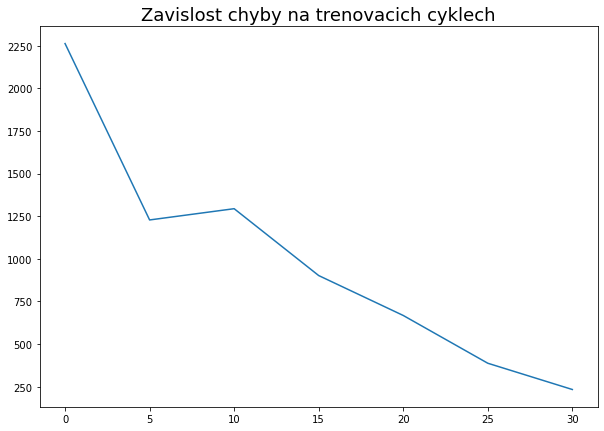

In [151]:
i = range(len(cost_list))
i = [item * 5 for item in i] # CISLO MUSI SEDET S TIM, CO JE V MODELU

# neberu kazdy error, jinak to osciluje hodne, graf je dost necitelny, neni dobre videt trend

plt.figure(figsize=(10, 7))
plt.plot(i, cost_list)
plt.title("Zavislost chyby na trenovacich cyklech", fontsize=18)
ax = plt.gca()
ax.set_facecolor('white')

plt.savefig('obr/nn_1layer_error_data2') # NUTNO ZMENIT PRO DANA DATA
plt.show()

## Klasifikace rastru

In [152]:
def createraster(X, pointsinrow):
    boundary = [np.amax(X[1, :]) + 0.2, np.amax(X[0, :]) + 0.2, np.amin(X[1, :]) - 0.2, np.amin(X[0, :]) - 0.2]  # clockwise
    
    print(np.amax(X[1, :]))
    print(np.amax(X[0, :]))
    print(np.amin(X[1, :]))
    print(np.amin(X[0, :]))
    
    top, right, bottom, left = boundary
    columnpoints = top - bottom
    raster = np.linspace([left, top], [right, top], pointsinrow)
    top -= columnpoints / pointsinrow

    while top >= bottom:
        raster_row = np.linspace([left, top], [right, top], pointsinrow)
        raster = np.concatenate((raster, raster_row), axis=0)
        top -= columnpoints / pointsinrow

    plt.show()

    return raster

In [153]:
pointsinrow = 200  # points in 1 row
raster = createraster(X, pointsinrow)

12.409329
13.435873
-14.29898
-11.071743


In [154]:
raster_classified = forward_propagation(raster.T, W, b)

In [155]:
raster_classes = []
points_with_class = []
points_without_class = []
for i in range(raster_classified.shape[1]):
    
    column = raster_classified[:,i]
    column_sum = np.sum(column)
    
    if column_sum == -3:
        raster_classes.append(np.squeeze(np.where(column == 1)))
        points_with_class.append(raster[i])

## Vykresleni oklasifikovaneho rastru

In [160]:
def plotPoints2(X, classes, Y, classes2):
    X = np.array(X)
    Y = np.array(Y)
    classes = np.array(classes)
    classes2 = np.array(classes2)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=classes2)
    plt.scatter(X[:, 0], X[:, 1], s=30, c=classes, edgecolors='black') # 'salmon' nebo classes
    plt.title("Klasifikace bodů vstupního prostoru", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.savefig('obr/nn_1layer_data2')
    plt.show()

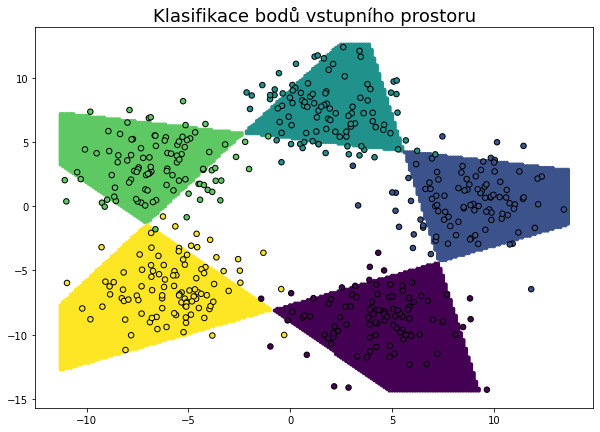

In [161]:
#plotPoints(points_with_class, raster_classes)
#plotPoints(X.T, classes)
plotPoints2(X.T, classes, points_with_class, raster_classes)